# Calculating time scales for *cis/trans* isomerization


In [1]:
!pwd

/Users/starwingchen/Voelz_Lab/git/peptoid_ESM/HREX/analysis


In [2]:
import numpy as np
from matplotlib import pyplot as plt

### Load in the omega angle trajectories by replica

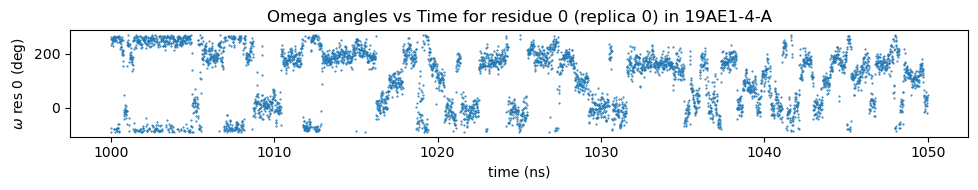

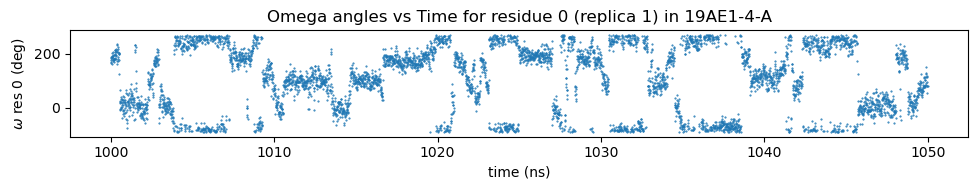

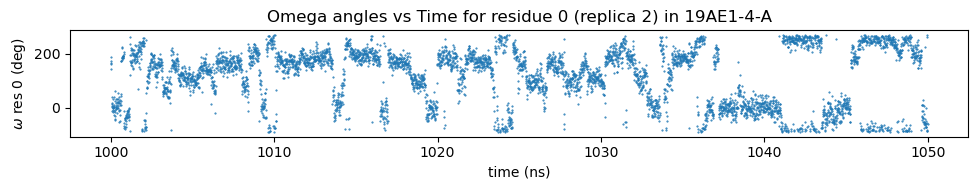

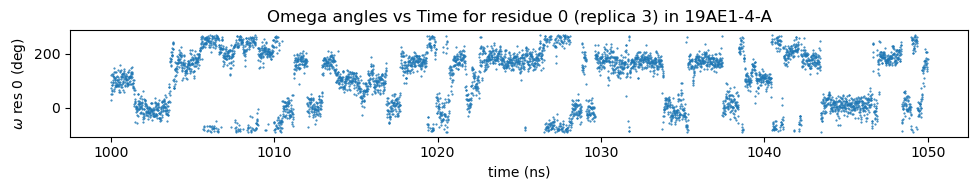

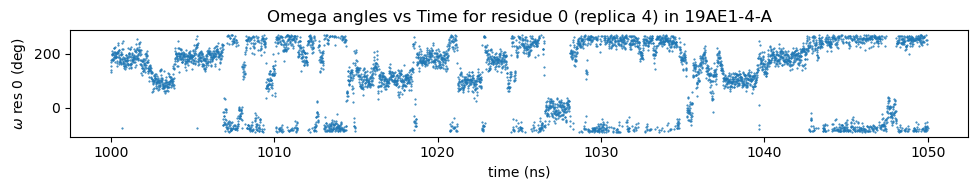

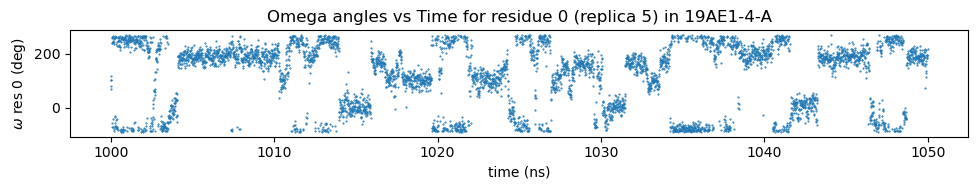

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Load in the omega angles by replica
dt_in_ns = 0.010   # 10 ps per snapshot
nreplicas = 6

omegas_by_replica = []
for i in range(nreplicas):
    # load in the angles
    angles = np.load(f'omega_data/omegas_rep{i}.npy') 
    # shift into (-90, 270) range to avoid periodic boundaries
    omegas_by_replica.append( (angles + 90.0)%360.0 - 90.0)
# print(omegas_by_replica)

# Plot omega angles vs time for selected residues for each replica
residues_to_plot = [0]
start = 100000
nsnaps = 105000
for i in range(nreplicas):
    plt.figure(figsize=(10, 2))
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(len(residues_to_plot), 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, omegas_by_replica[i][start:nsnaps, residue], '.', ms=1)
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ res {residue} (deg)')
        plt.title(f'Omega angles vs Time for residue {residue} (replica {i}) in 19AE1-4-A')
    plt.tight_layout()
plt.show()



## Convert the omega angle trajectories to cis(0)/trans(1) trajectories 

In [4]:
cistrans_by_replica = []
for i in range(nreplicas):
    cistrans_by_replica.append( (np.where(omegas_by_replica[i] > 90.0, 1, 0)).astype(int) )

print(cistrans_by_replica)
print(f"The Shape of cistrans_by_replica is : {np.shape(cistrans_by_replica)}")


[array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]]), array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]]), array([[1, 1, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]]), array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1],
       ...,
       [1, 0, 1],
       [0, 1, 1],
       [1, 0, 1]]), array([[1, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 1]]), array([[1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])]
The Shape of cistrans_by_replica is : (6, 600030, 3)


#### compile transition probabilities as a function of lag time (in steps)

In [5]:
def get_transition_matrix(cistrans_traj, lagtime=10, sliding_window=True, pseudocount=0.25):
    """Returns a row-normalized transiton matrix T for a given lagtime (in steps)."""

    C = np.zeros( (2,2) )   # count matrix
    T = np.zeros( (2,2) )   # transition matrix
    
    N = len(cistrans_traj)  # the length of the trajectory
    for t in range(0, N-lagtime):
        C[cistrans_traj[t],cistrans_traj[t+lagtime]] += 1.0

    # add pseudocounts to avoid zero entries
    C += pseudocount    
    
    # row-normalize
    T[0,:] = C[0,:]/C[0,:].sum()
    T[1,:] = C[1,:]/C[1,:].sum()

    return T

def implied_timesale(T, lagtime=1):
    """Return the implied timescale, in units of number of steps.
    
    INPUT
    T       - transition matrix where T_ij is prob of transitioning i -> j in lagtime.
    
    PARAMETERS
    lagtime - lagtime used to build T (in units of steps). Default = 1
    
    RETURN
    t2      - the implied timescale (in units of steps)
    """
    try:
        evals = np.linalg.eigvals( T.transpose() )  # will be something like [0.99754545 1.        ]
        mu2 = min(evals) # non-stational eigenvalue of T
        # print('mu2', mu2, 'evals', evals, 'T', T)
        t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
    except:
        t2 = np.nan
        
    return t2
    
    

## Let's make an implied timescale plot for each omega angle

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100, 40100, 41100, 42100, 43100, 44100, 45100, 46100, 47100, 48100, 49100, 50100, 51100, 52100, 53100, 54100, 55100, 56100, 57100, 58100, 59100, 60100, 61100, 62100, 63100, 64100, 65100, 66100, 67100, 68100, 69100, 70100, 71100, 72100, 73100, 74100, 75100, 76100, 77100, 78100, 79100, 80100, 81100, 82100, 83100, 84100, 85100, 86100, 87100, 88100, 89100, 90100, 91100, 92100, 93100, 94100, 95100, 96100, 97100, 98100, 99100, 100100, 101100, 102100, 103100, 104100, 105100, 106100, 107100, 108100, 109100, 110100, 111100, 112100, 113100, 114100, 115100, 116100, 117100, 118100, 119100, 120100, 121100, 122100, 123100, 124100, 125100, 126100, 127100, 128100, 129100, 130100, 131100, 132100, 133100, 134100, 1351

/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_24846/3580757966.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arr

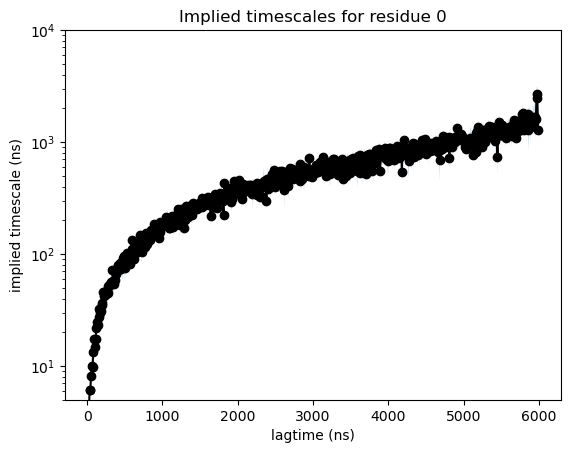

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100, 40100, 41100, 42100, 43100, 44100, 45100, 46100, 47100, 48100, 49100, 50100, 51100, 52100, 53100, 54100, 55100, 56100, 57100, 58100, 59100, 60100, 61100, 62100, 63100, 64100, 65100, 66100, 67100, 68100, 69100, 70100, 71100, 72100, 73100, 74100, 75100, 76100, 77100, 78100, 79100, 80100, 81100, 82100, 83100, 84100, 85100, 86100, 87100, 88100, 89100, 90100, 91100, 92100, 93100, 94100, 95100, 96100, 97100, 98100, 99100, 100100, 101100, 102100, 103100, 104100, 105100, 106100, 107100, 108100, 109100, 110100, 111100, 112100, 113100, 114100, 115100, 116100, 117100, 118100, 119100, 120100, 121100, 122100, 123100, 124100, 125100, 126100, 127100, 128100, 129100, 130100, 131100, 132100, 133100, 134100, 1351

/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_24846/3580757966.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arr

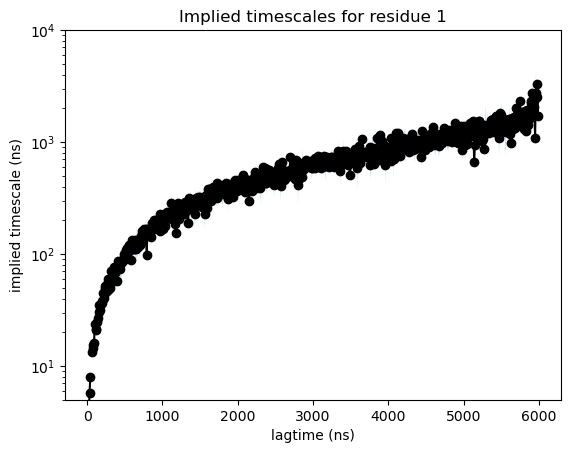

lagtimes = [1, 10, 25, 50, 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100, 10100, 11100, 12100, 13100, 14100, 15100, 16100, 17100, 18100, 19100, 20100, 21100, 22100, 23100, 24100, 25100, 26100, 27100, 28100, 29100, 30100, 31100, 32100, 33100, 34100, 35100, 36100, 37100, 38100, 39100, 40100, 41100, 42100, 43100, 44100, 45100, 46100, 47100, 48100, 49100, 50100, 51100, 52100, 53100, 54100, 55100, 56100, 57100, 58100, 59100, 60100, 61100, 62100, 63100, 64100, 65100, 66100, 67100, 68100, 69100, 70100, 71100, 72100, 73100, 74100, 75100, 76100, 77100, 78100, 79100, 80100, 81100, 82100, 83100, 84100, 85100, 86100, 87100, 88100, 89100, 90100, 91100, 92100, 93100, 94100, 95100, 96100, 97100, 98100, 99100, 100100, 101100, 102100, 103100, 104100, 105100, 106100, 107100, 108100, 109100, 110100, 111100, 112100, 113100, 114100, 115100, 116100, 117100, 118100, 119100, 120100, 121100, 122100, 123100, 124100, 125100, 126100, 127100, 128100, 129100, 130100, 131100, 132100, 133100, 134100, 1351

/var/folders/2g/yfyfpy7d3n3fwl_23ytkftvm0000gn/T/ipykernel_24846/3580757966.py:36: RuntimeWarning: invalid value encountered in log
  t2 = -1.0*lagtime/np.log(mu2)  # the implied timescale relation
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/starwingchen/anaconda3/envs/PeptoidFF/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arr

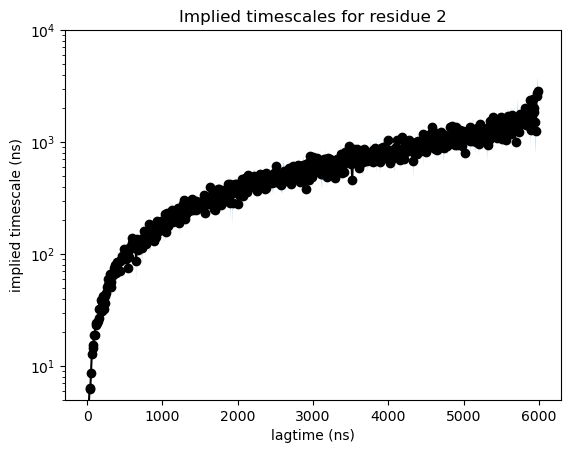

In [14]:
residues = [0,1,2]
for residue in residues:
    
    lagtimes = [1, 10, 25, 50] + list(range(100, 600030, 1000))
    print('lagtimes =', lagtimes)
    
    t2_means = []  # mean timescales for each lagtime
    t2_uppers  = []  # upperlim of standard deviation of log t2 for each lagtime
    t2_lowers  = []  # lowerlim
    
    for lagtime in lagtimes:
    
        # Each replica is a separate data set we can use for uncertainty estimation
        logt2_values = []    
        for i in range(nreplicas):
            T = get_transition_matrix(cistrans_by_replica[i][:,residue], lagtime=lagtime)
            logt2_values.append(np.log(implied_timesale(T, lagtime=lagtime)))
        logt2_values = np.array(logt2_values)    
        Ind = ~np.isnan(logt2_values)
        t2_means.append( np.exp(np.mean(logt2_values[Ind] ) ))
        t2_uppers.append( np.exp( np.mean(logt2_values[Ind] ) + np.std(logt2_values[Ind]) ))
        t2_lowers.append( np.exp( np.mean(logt2_values[Ind] ) - np.std(logt2_values[Ind]) ))
    
    t2_means = np.array(t2_means)
    t2_uppers = np.array(t2_uppers)
    t2_lowers = np.array(t2_lowers)
    lagtimes  = np.array(lagtimes)
    
    plt.figure()
    plt.plot(lagtimes*dt_in_ns, t2_means*dt_in_ns, 'ko-')
    plt.fill_between(lagtimes*dt_in_ns, t2_uppers*dt_in_ns, t2_lowers*dt_in_ns, alpha=0.2)
    plt.xlabel('lagtime (ns)')
    plt.ylabel('implied timescale (ns)')
    plt.ylim(5,10000)
    plt.yscale('log')
    plt.title(f'Implied timescales for residue {residue}')
    plt.show()
    

In [3]:
def autocorr(x):
    tau = x.size
    mu = x.mean()
    var = x.var()  # Variance for normalization
    g = np.correlate((x-mu), (x-mu), mode='full')[tau-1:]
    g = g / var
    n = np.arange(tau,0,-1)
    return g/n

(6, 3, 600030)


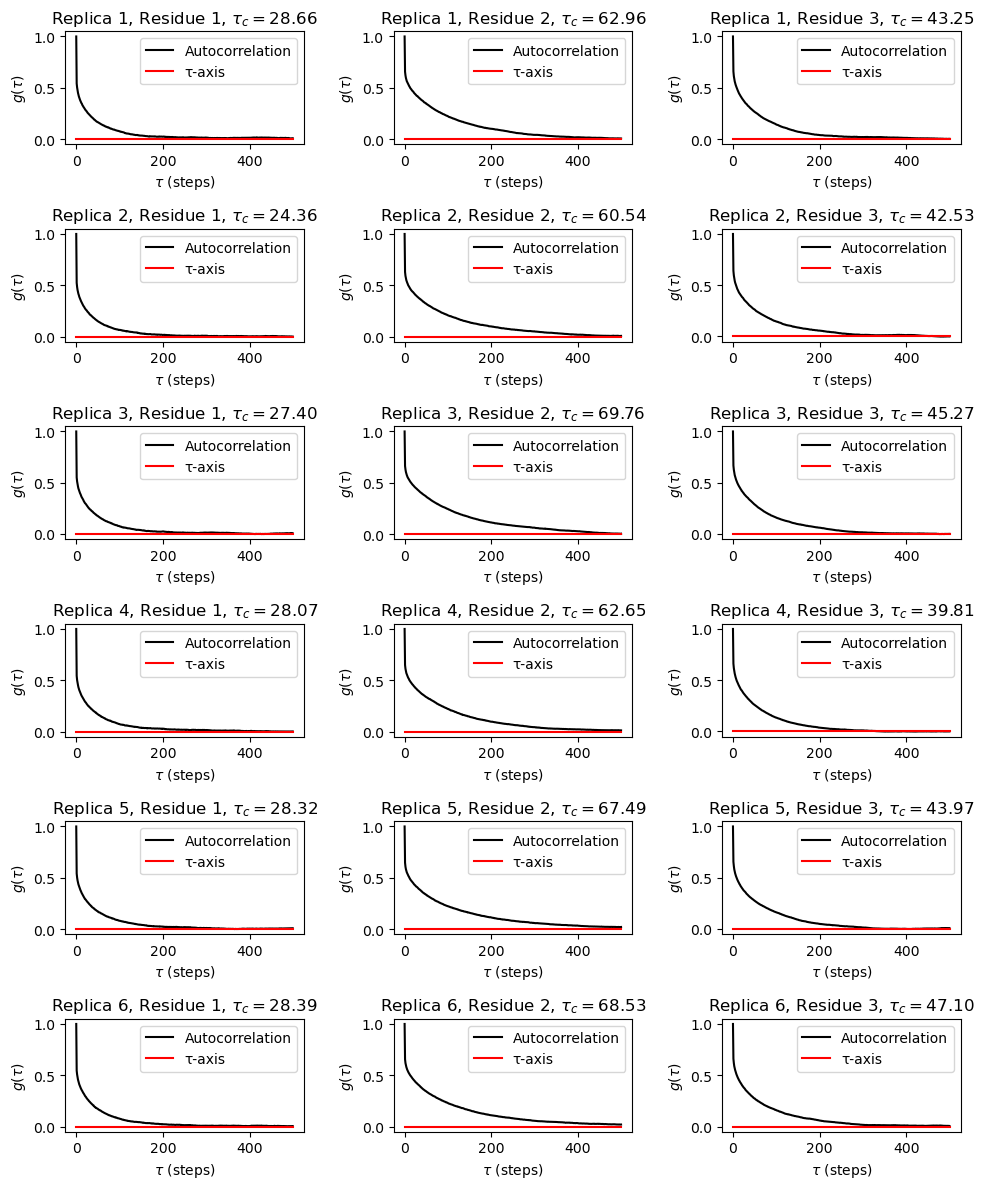

In [4]:
# Load in the omega angles by replica
dt_in_ns = 0.010   # 10 ps per snapshot
nreplicas = 6
Nmax = 500 # Maximum number of steps to display in plots


# Convert list of lists to a NumPy array
omegas_by_replica = np.array(omegas_by_replica)

nreplicas, timesteps, residues = omegas_by_replica.shape

# Calculate autocorrelation for each replica and residue
autocorr_results = np.zeros((nreplicas, residues, timesteps))


for i in range(nreplicas):
    for j in range(residues):
        omega_angles = omegas_by_replica[i, :, j]
        autocorr_results[i, j, :] = autocorr(omega_angles)

print(autocorr_results.shape)  # Should output (6, 3, 80004)

fig, axes = plt.subplots(nreplicas, residues, figsize=(10, 2 * nreplicas))
axes = np.atleast_2d(axes)  # Ensure axes is always 2D for consistent indexing

for i in range(nreplicas):
    for j in range(residues):
        ax = axes[i, j]
        g = autocorr_results[i, j, :]
        tau_c = np.sum(g[0:Nmax])
        
        ax.plot(np.arange(Nmax), g[:Nmax], 'k-', label='Autocorrelation')  # Plot the autocorrelation
        ax.plot([0, Nmax], [0, 0], 'r-', label='τ-axis')  # Red horizontal line at zero
        
        ax.set_xlabel('$\\tau$ (steps)')
        ax.set_ylabel('$g(\\tau)$')
        ax.set_title(f'Replica {i+1}, Residue {j+1}, $\\tau_c = {tau_c:.2f}$')  # Display tau_c in title
        ax.legend()

plt.tight_layout()
plt.show()


In [13]:
# Save the autocorrelation results to a .npy file
np.save('autocorr_results.npy', autocorr_results)

# To load it back later
autocorr_results = np.load('autocorr_results.npy')



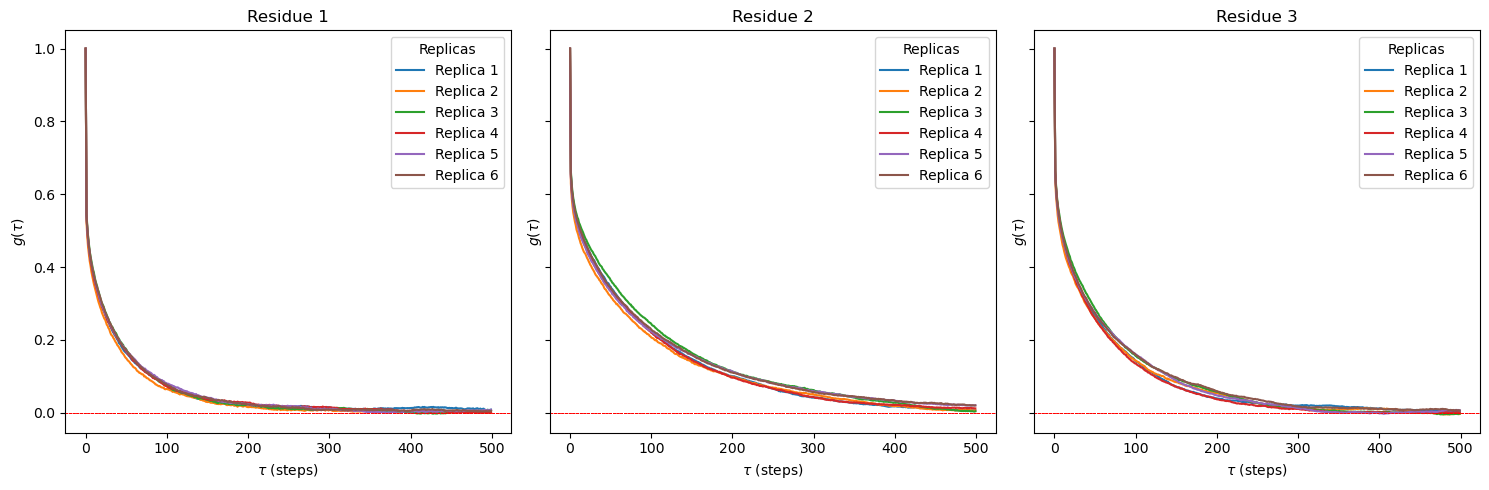

In [16]:
fig, axes = plt.subplots(1, residues, figsize=(15, 5), sharey=True)  # One row, three subplots for residues

for j in range(residues):  # Iterate over residues
    ax = axes[j]
    for i in range(nreplicas):  # Iterate over replicas
        g = autocorr_results[i, j, :]
        tau_c = np.sum(g[0:Nmax])

        ax.plot(np.arange(Nmax), g[:Nmax], label=f'Replica {i+1}')  # Plot each replica's autocorrelation
        ax.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal line at zero for reference

    ax.set_xlabel('$\\tau$ (steps)')
    ax.set_ylabel('$g(\\tau)$')
    ax.set_title(f'Residue {j+1}')
    ax.legend(title='Replicas', loc='upper right')

plt.tight_layout()
plt.show()


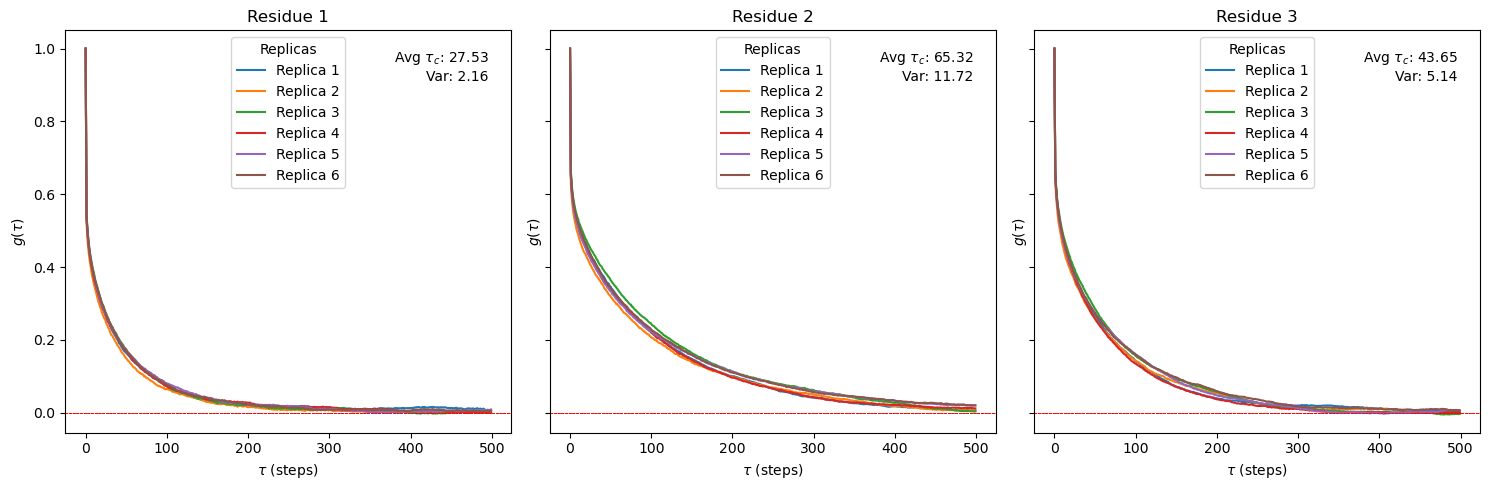

Residue 1: Avg $\tau_c$ = 27.53, Variance = 2.16
Residue 2: Avg $\tau_c$ = 65.32, Variance = 11.72
Residue 3: Avg $\tau_c$ = 43.65, Variance = 5.14


In [20]:
fig, axes = plt.subplots(1, residues, figsize=(15, 5), sharey=True)  # One row, three subplots for residues

# Store average and variance of tau_c for each residue
tau_c_avg = []
tau_c_var = []

for j in range(residues):  # Iterate over residues
    ax = axes[j]
    tau_c_values = []  # Collect tau_c for all replicas for this residue

    for i in range(nreplicas):  # Iterate over replicas
        g = autocorr_results[i, j, :]
        tau_c = np.sum(g[0:Nmax])  # Calculate tau_c
        tau_c_values.append(tau_c)

        # Plot autocorrelation for each replica
        ax.plot(np.arange(Nmax), g[:Nmax], label=f'Replica {i+1}')
        ax.axhline(0, color='r', linestyle='--', linewidth=0.5)  # Horizontal zero line

    # Calculate average and variance of tau_c
    tau_c_avg_residue = np.mean(tau_c_values)
    tau_c_var_residue = np.var(tau_c_values)
    tau_c_avg.append(tau_c_avg_residue)
    tau_c_var.append(tau_c_var_residue)

    # Annotate the subplot with average and variance
    ax.text(0.95, 0.95, f'Avg $\\tau_c$: {tau_c_avg_residue:.2f}\nVar: {tau_c_var_residue:.2f}',
            transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')

    ax.set_xlabel('$\\tau$ (steps)')
    ax.set_ylabel('$g(\\tau)$')
    ax.set_title(f'Residue {j+1}')
    ax.legend(title='Replicas', loc='upper center')

plt.tight_layout()
plt.show()

# Print overall statistics for reference
for j in range(residues):
    print(f'Residue {j+1}: Avg $\\tau_c$ = {tau_c_avg[j]:.2f}, Variance = {tau_c_var[j]:.2f}')
